## Classification TASKS

## Importing Wine DATA

In [294]:
import sklearn
from sklearn.datasets import load_wine
import os
from six.moves import urllib


# Identifying the download path and file path
DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/"
wine_path = os.path.join("datasets", "wine")
wine_url = DOWNLOAD_ROOT + "wine/wine.data"

# Creating datasets folder and wine folder if necessary
if not os.path.isdir(wine_path):
    os.makedirs(wine_path)

# Saving the wine data as a csv file in the wine folder
csv_path = os.path.join(wine_path, "wine.csv")
urllib.request.urlretrieve(wine_url, csv_path)

# Creating a list of all the wine attributes and adding the missing class attribute
wine_data = load_wine()
attributes = ['class']
attributes += wine_data.feature_names

# Adding a header to the wine.csv file
with open('datasets/wine/wine.csv',newline='') as f:
    r = csv.reader(f)
    temp_wine_data = [line for line in r]
with open('datasets/wine/wine.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(attributes)
    w.writerows(temp_wine_data)


In [295]:
import pandas as pd

def load_wine_data(wine_path):
    csv_path = os.path.join(wine_path, "wine.csv")
    return pd.read_csv(csv_path)

## Verifying Data Formatted Correctly

In [296]:
wine = load_wine_data(wine_path)
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Setting up where to save Images

In [277]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
TASK_ID = "Homework_3_Classifications_Task"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", TASK_ID)

# Creating images folder if necessary
if not os.path.isdir(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Outputting the shape of the data set

Saving figure attribute_histogram_plots


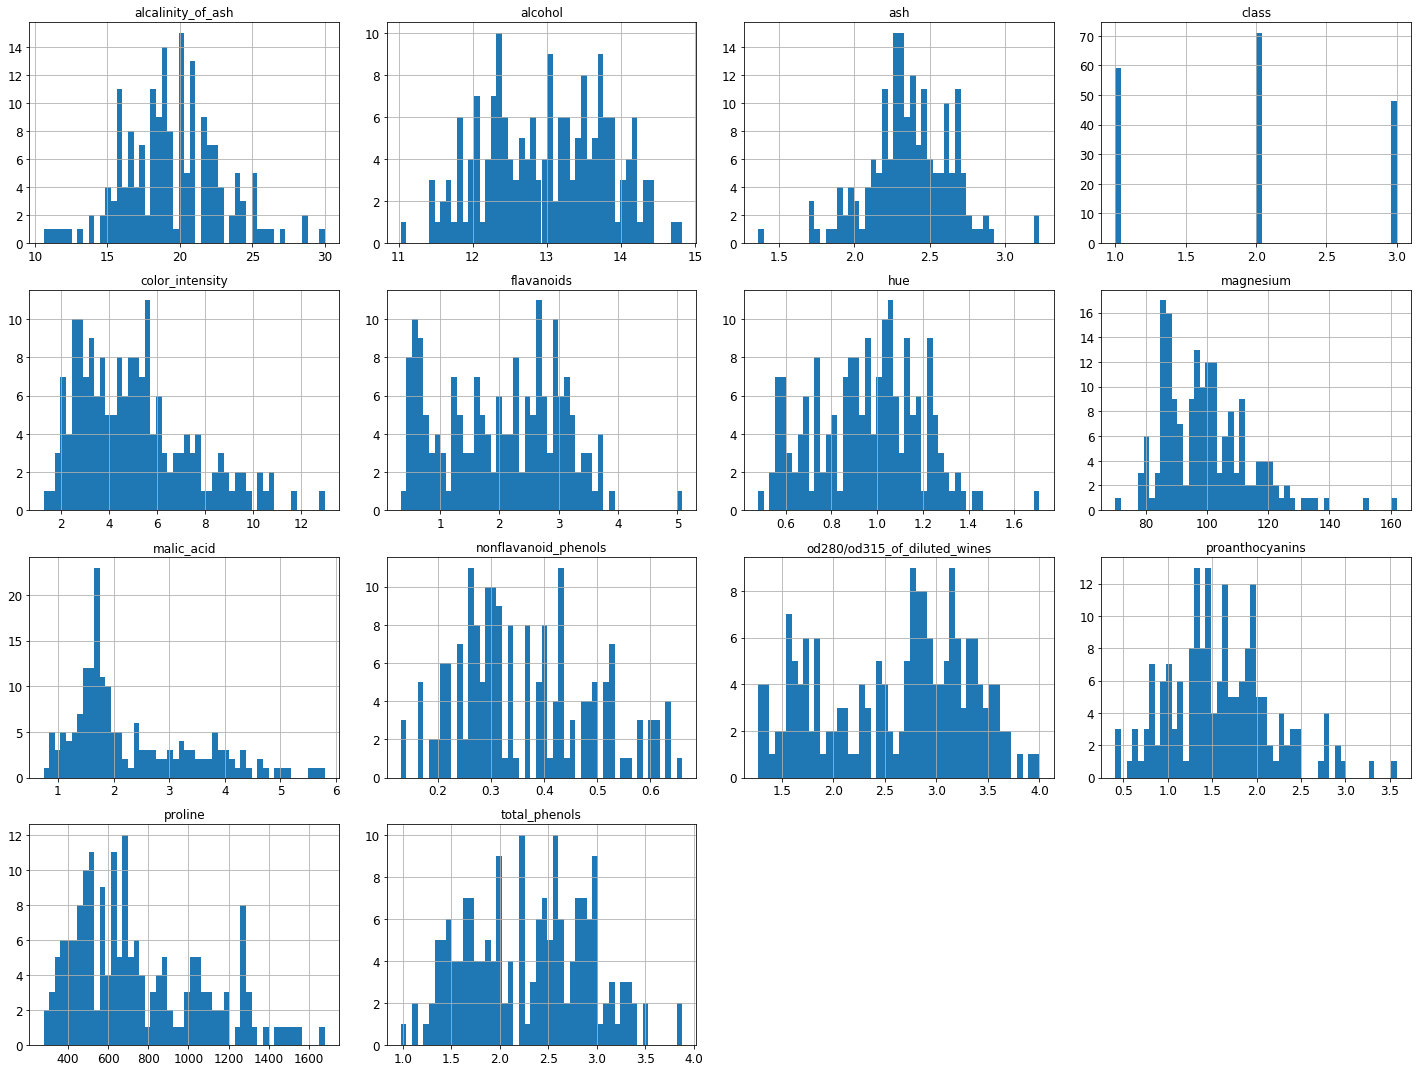

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Minimum, Maximum, and Average values of each Attribute

In [297]:
wine.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Creating Scatter Matrix

Saving figure scatter_matrix_plot


C:\Users\herbj\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


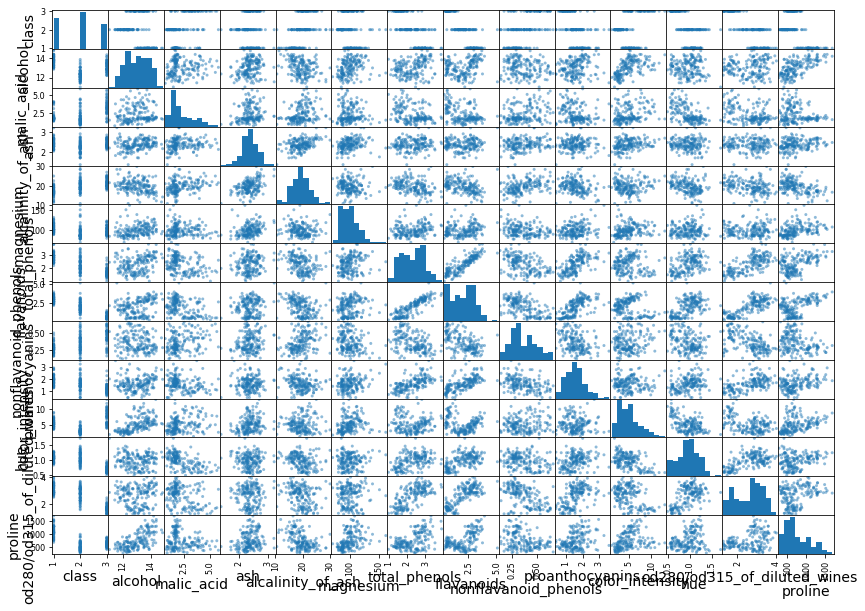

In [280]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

scatter_matrix(wine[attributes], figsize=(14, 10))
save_fig("scatter_matrix_plot")

Saving figure simple_scatter_matrix_plot


C:\Users\herbj\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


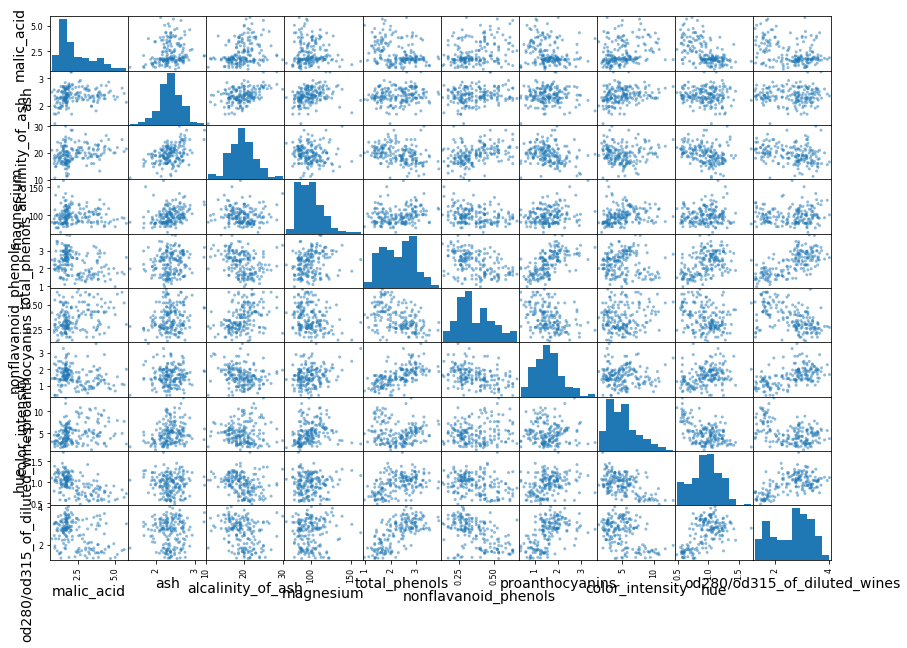

In [281]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

names = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
         'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 
         'color_intensity', 'hue', 'od280/od315_of_diluted_wines']

scatter_matrix(wine[names], figsize=(14, 10))
save_fig("simple_scatter_matrix_plot")

In [298]:
print(attributes)

['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [283]:
corr_matrix = wine.corr()
corr_matrix["malic_acid"].sort_values(ascending=False)

malic_acid                      1.000000
class                           0.437776
nonflavanoid_phenols            0.292977
alcalinity_of_ash               0.288500
color_intensity                 0.248985
ash                             0.164045
alcohol                         0.094397
magnesium                      -0.054575
proline                        -0.192011
proanthocyanins                -0.220746
total_phenols                  -0.335167
od280/od315_of_diluted_wines   -0.368710
flavanoids                     -0.411007
hue                            -0.561296
Name: malic_acid, dtype: float64

## Splitting data into test set and training sets

In [299]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [300]:
wine_train_set, wine_test_set = split_train_test(wine, 0.2)
print(len(wine_train_set), "train +", len(wine_test_set), "test")
wine_train_set.head()

143 train + 35 test


,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
150,3,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520


## Removing Redundant or unwanted attributes

In [301]:
wine_labels = wine_train_set["class"].copy()
wine_train_set = wine_train_set.drop("class", axis=1) # drop labels for training set
wine_train_set = wine_train_set.drop("alcohol", axis=1) # drop labels for training set
wine_train_set = wine_train_set.drop("flavanoids", axis=1) # drop labels for training set
wine_train_set = wine_train_set.drop("proline", axis=1) # drop labels for training set

In [304]:
wine_train_set.head()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
138,3.59,2.19,19.5,88,1.62,0.58,0.88,5.70,0.81,1.82
30,1.50,2.70,22.5,101,3.00,0.29,2.38,5.70,1.19,2.71
45,4.04,2.44,18.9,111,2.85,0.30,1.25,5.24,0.87,3.33
150,3.12,2.62,24.0,123,1.40,0.22,1.25,8.60,0.59,1.30
84,0.89,2.58,18.0,94,2.20,0.22,2.35,3.05,0.79,3.08


## KNN implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

## Logistic Regression

## Linear SVM

## Regression TASKS

In [205]:
import sklearn
from sklearn.datasets import load_diabetes
import os
from six.moves import urllib
import csv

#https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
#http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
#https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt
    
# Identifying the download path and file path
DOWNLOAD_ROOT = "http://www4.stat.ncsu.edu/~boos/var.select/"
diabetes_path = os.path.join("datasets", "diabetes")
diabetes_url = DOWNLOAD_ROOT + "diabetes.rwrite1.txt"

# Creating datasets folder and diabetes folder if necessary
if not os.path.isdir(diabetes_path):
    os.makedirs(diabetes_path)

# Saving the wine data as a csv file in the diabetes folder
csv_path = os.path.join(diabetes_path, "diabetes.txt")
urllib.request.urlretrieve(diabetes_url, csv_path)

# Creating a list of all the diabetes attributes and adding the missing class attribute
diabetes_data = load_diabetes()
#diabetes_attributes = diabetes_data.feature_names
    
with open('datasets/diabetes/diabetes.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(" ") for line in stripped if line)
    with open('datasets/diabetes/diabetes.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)

In [206]:
import pandas as pd

def load_diabetes_data(diabetes_path):
    csv_path = os.path.join(diabetes_path, "diabetes.csv")
    return pd.read_csv(csv_path)

In [220]:
diabetes = load_diabetes_data(diabetes_path)
diabetes_attributes = list(diabetes)
diabetes.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [209]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
TASK_ID = "Homework_3_Regression_Task"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", TASK_ID)

# Creating images folder if necessary
if not os.path.isdir(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_diabetes_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Saving figure attribute_histogram_plots


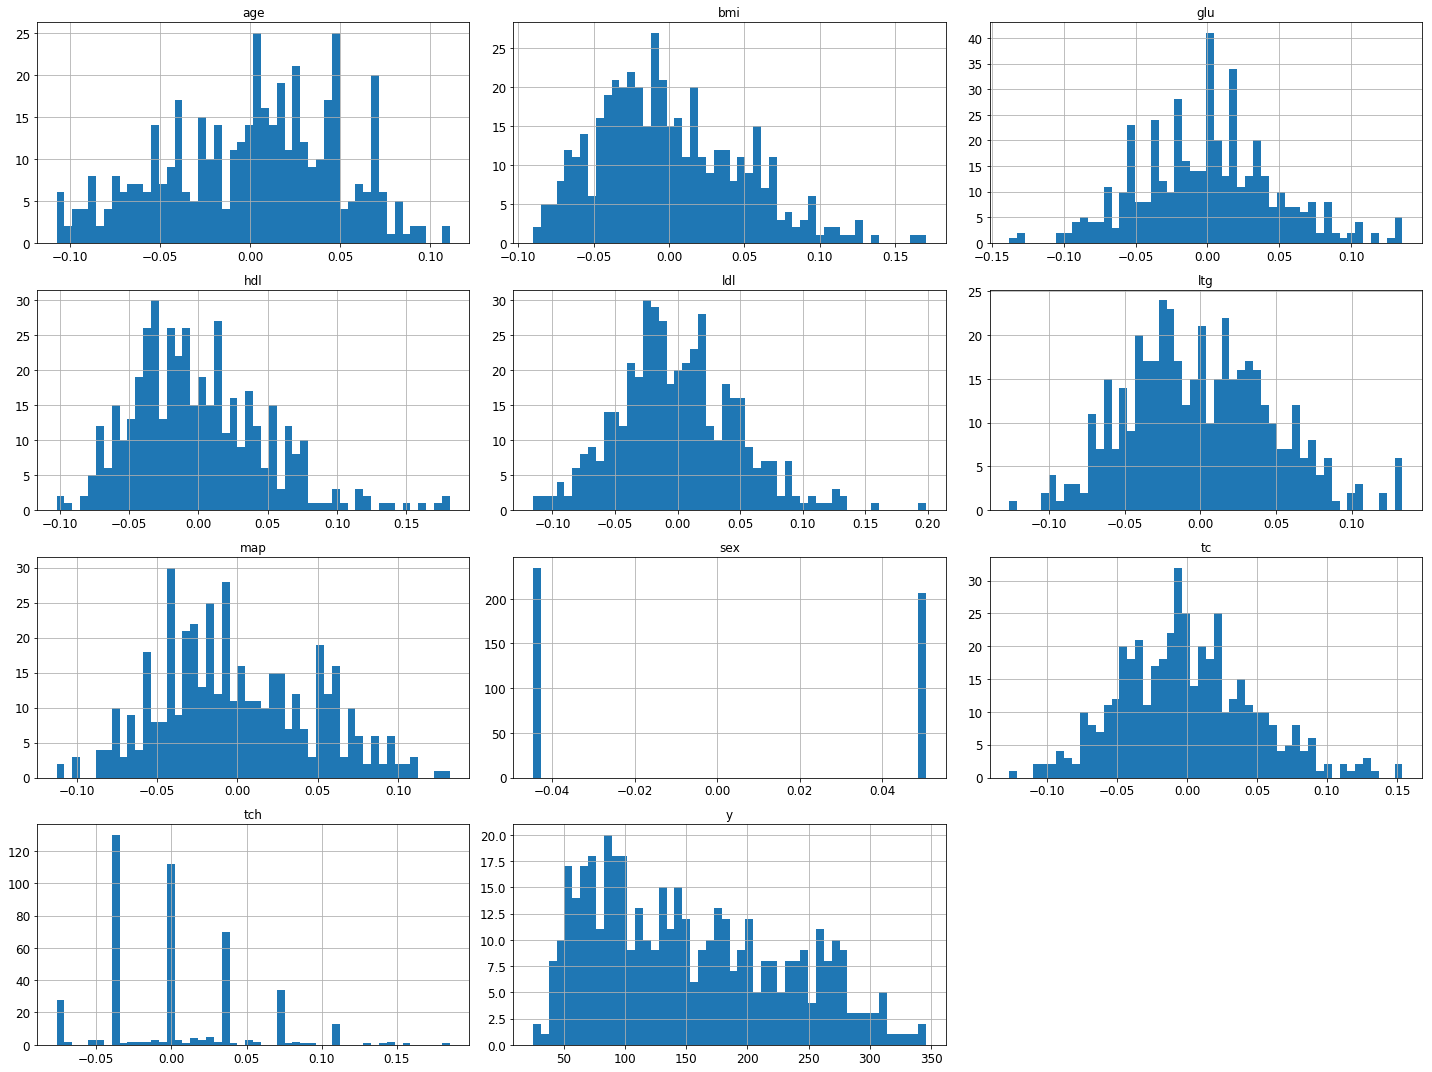

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(20,15))
save_diabetes_fig("attribute_histogram_plots")
plt.show()

In [212]:
diabetes.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.642134e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.785079e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.828578e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Saving figure scatter_matrix_plot


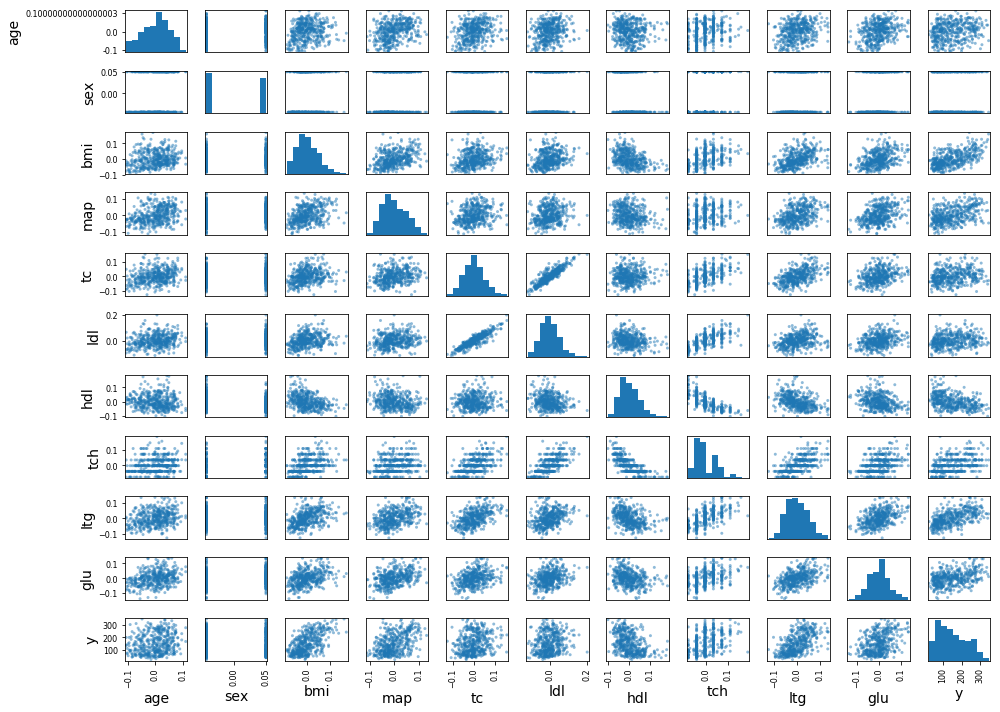

In [221]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

scatter_matrix(diabetes[diabetes_attributes], figsize=(14, 10))
save_diabetes_fig("scatter_matrix_plot")

Saving figure simple_scatter_matrix_plot


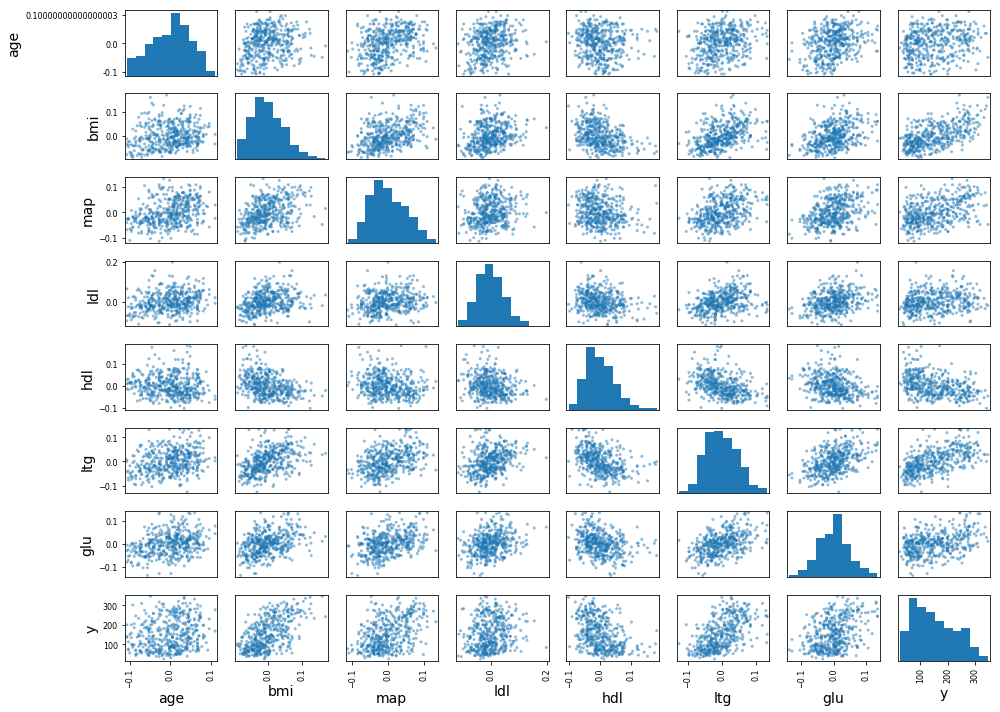

In [233]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

names = ["age", "bmi", "map", "ldl", "hdl", "ltg", "glu", "y"]

scatter_matrix(diabetes[names], figsize=(14, 10))
save_diabetes_fig("simple_scatter_matrix_plot")

In [225]:
corr_matrix = diabetes.corr()
corr_matrix["tch"].sort_values(ascending=False)

tch    1.000000
ldl    0.659817
ltg    0.617857
tc     0.542207
y      0.430453
glu    0.417212
bmi    0.413807
sex    0.332115
map    0.257653
age    0.203841
hdl   -0.738493
Name: tch, dtype: float64

In [226]:
list(diabetes)

['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'y']

In [252]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
map    442 non-null float64
tc     442 non-null float64
ldl    442 non-null float64
hdl    442 non-null float64
tch    442 non-null float64
ltg    442 non-null float64
glu    442 non-null float64
y      442 non-null int64
dtypes: float64(10), int64(1)
memory usage: 38.1 KB
